# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

Index(['Unnamed: 0', 'data_ref', 'index', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'mau', 'renda'],
      dtype='object')


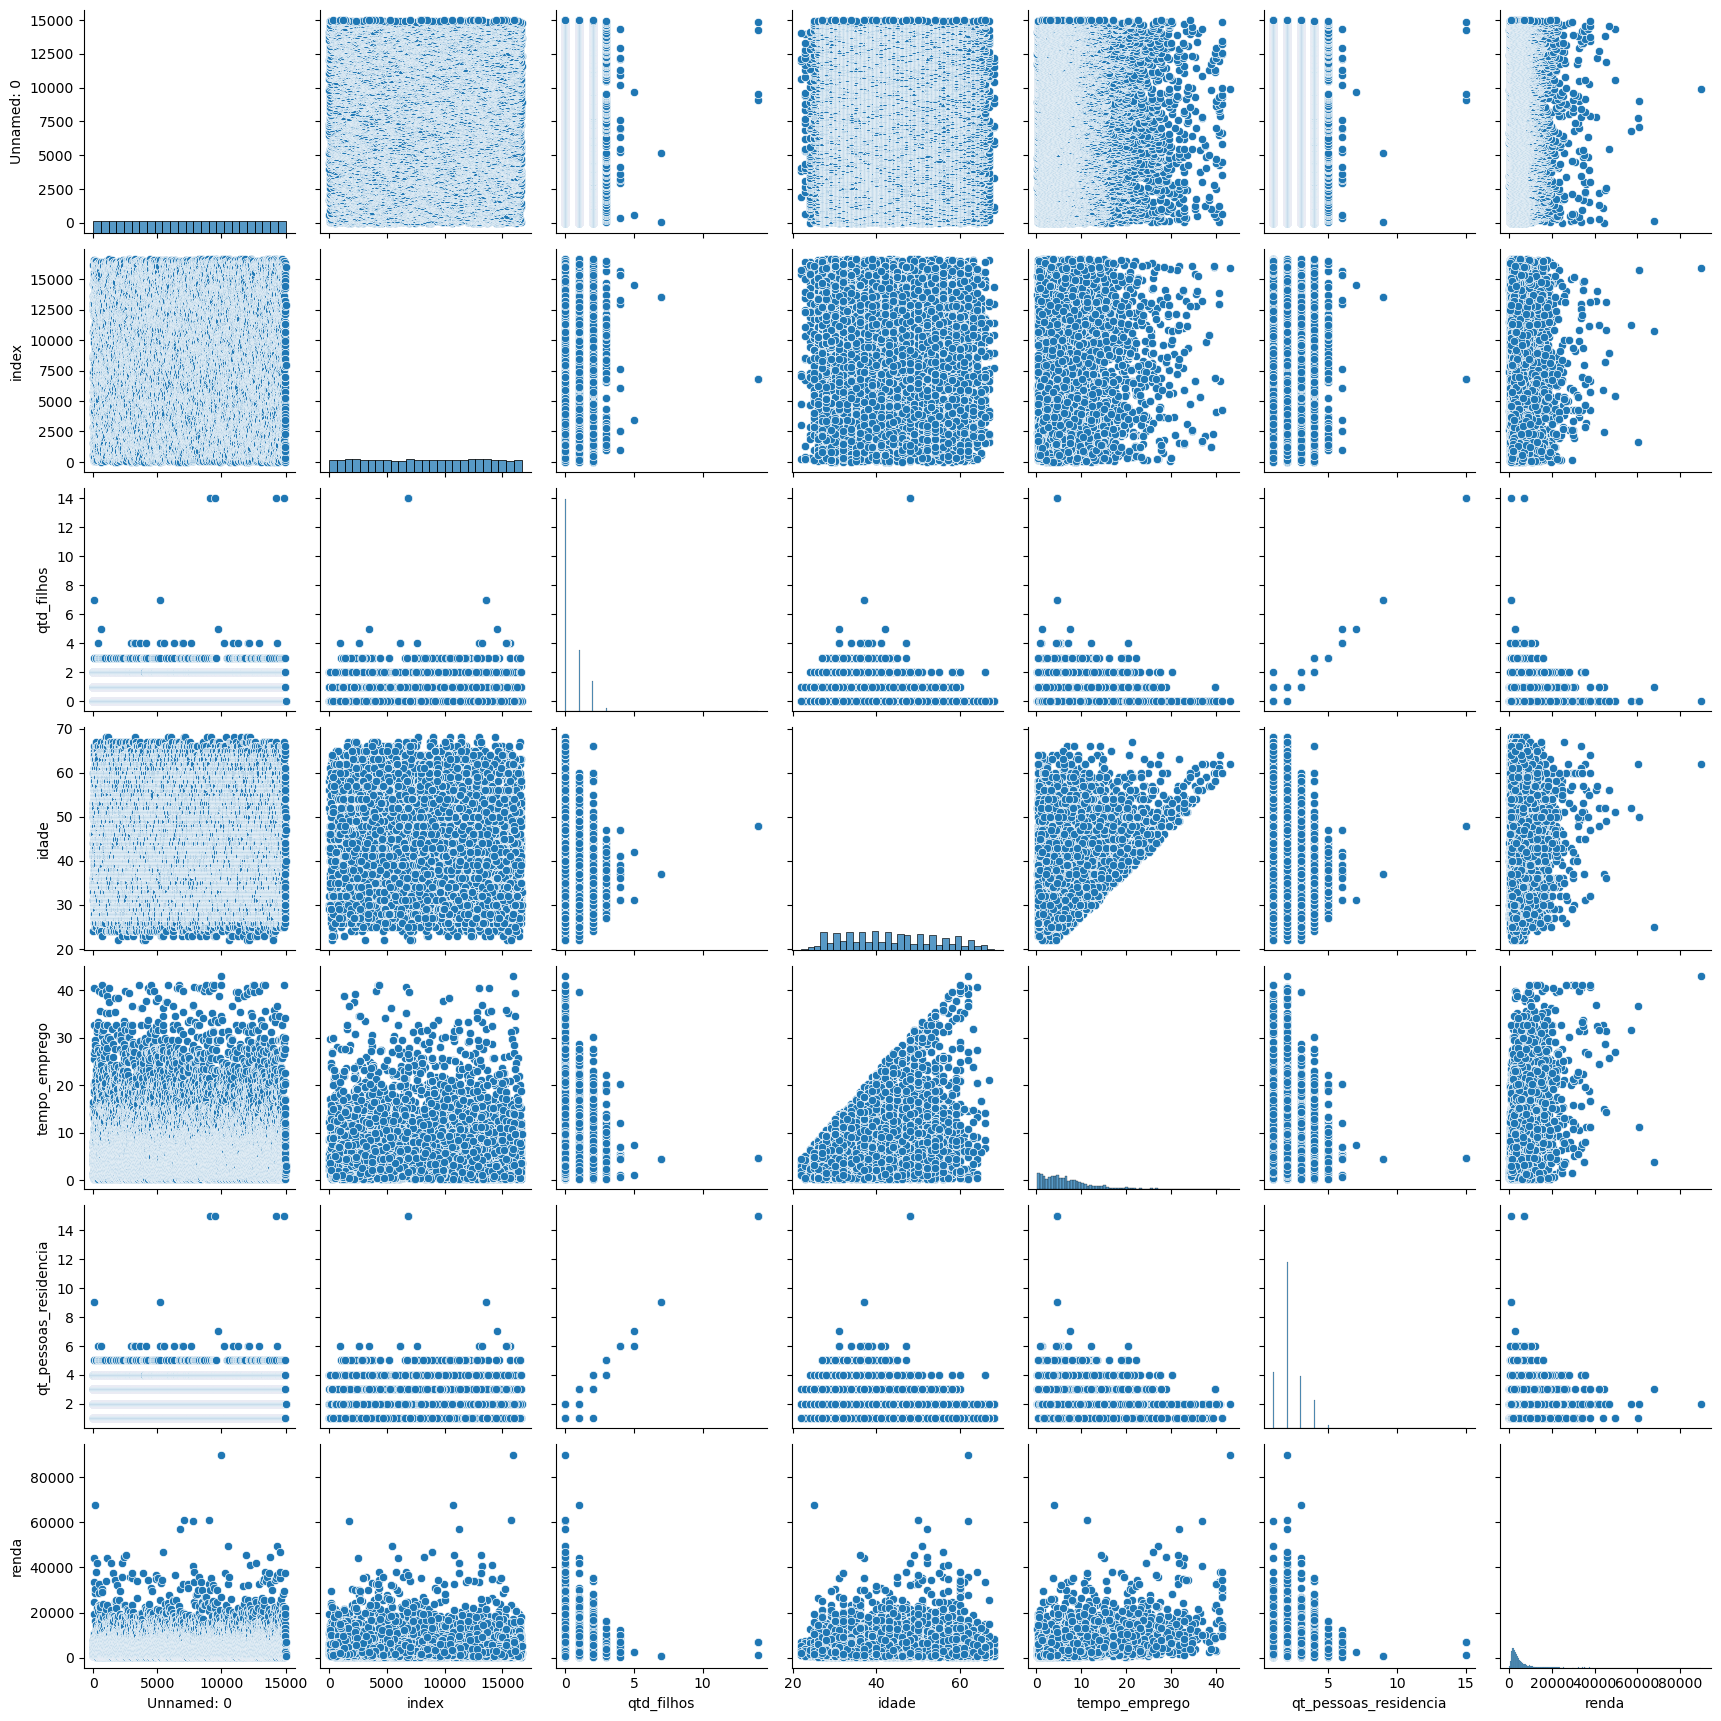

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


previsao = pd.read_csv('Profissao- Cientista de Dados_M10_support material.csv')
print(previsao.columns)
quantitative_vars = previsao.select_dtypes(include = ['float64', 'int64'])
sns.pairplot(quantitative_vars)
plt.show()

# cmap = sns.diverging_palette(h_neg = 125, h_pos = 350, as_cmap = True, sep = 60, center = 'light')
# previsao_filtrado = previsao[var]
# print(previsao_filtrado)
# sns.clustermap(previsao_filtrado.corr(), figsize = (10,10), center = 0, cmap=cmap)

As relações que parecem mais contundentes são a de diminuição da renda conforme se aumenta o número de filhos, ou o número de pessoas na residência...

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

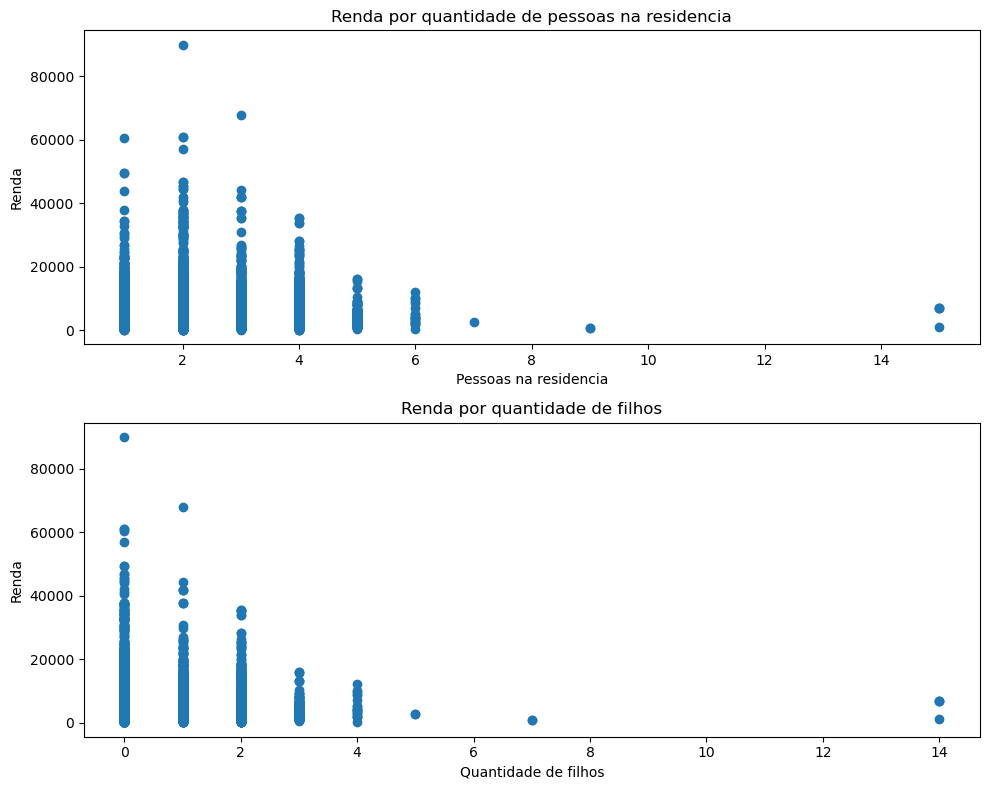

In [23]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 8))

ax1.scatter(previsao['qt_pessoas_residencia'], previsao['renda'])
ax1.set_title('Renda por quantidade de pessoas na residencia')
ax1.set_xlabel('Pessoas na residencia')
ax1.set_ylabel('Renda')

ax2.scatter(previsao['qtd_filhos'], previsao['renda'])
ax2.set_title('Renda por quantidade de filhos')
ax2.set_ylabel('Renda')
ax2.set_xlabel('Quantidade de filhos')

fig.tight_layout()
plt.show()

3) Na su aopinião, há outliers na variável renda?

Creio que não. O que talvez pudesse levar-nos a pensar que há um outlier, é a parte que diz que há 14 filhos, ou 15 pessoas na residência. Embora improvável, é uma situação longe de ser impossível, e que, de todo modo não afeta em muito a análise. Um fator a ser considerado, no entanto, é a baixíssima renda documentada pra uma familia com 15 pessoas... possivelmente o que aconteceu, é que quem forneceu os dados estava considerando como moradores da residência filhos que já moram sozinho. Portanto, temos um outlier não em renda, mas sim em qtd_pessoas_residencia.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

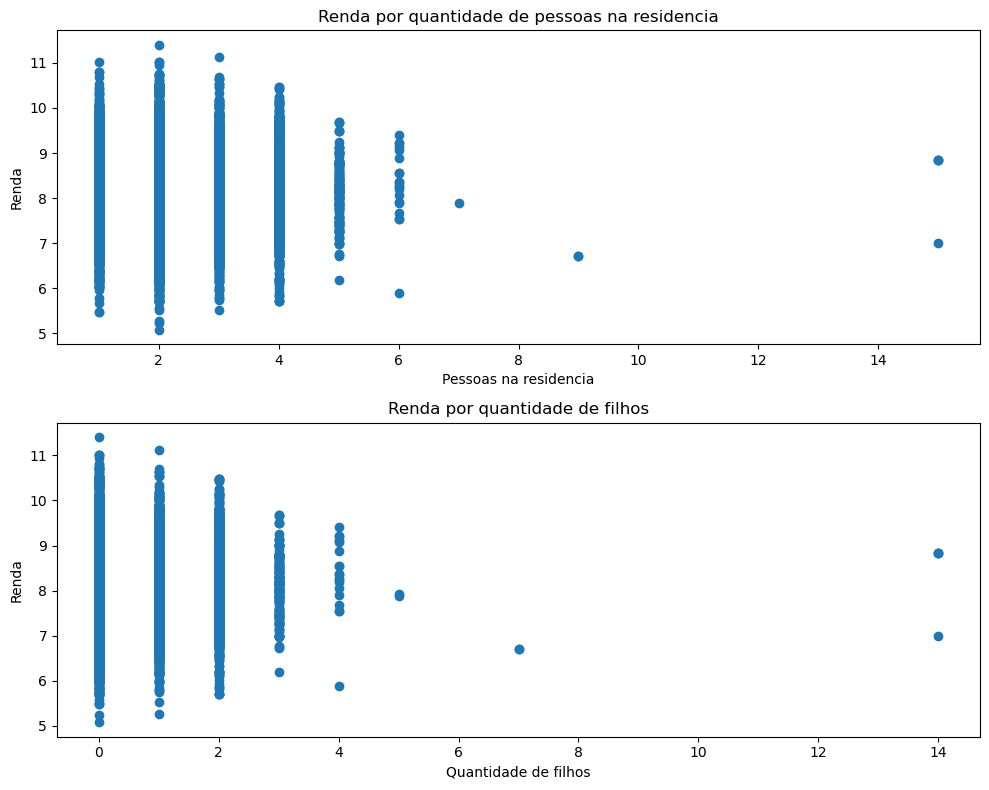

In [25]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 8))

ax1.scatter(previsao['qt_pessoas_residencia'], np.log(previsao['renda']))
ax1.set_title('Renda por quantidade de pessoas na residencia')
ax1.set_xlabel('Pessoas na residencia')
ax1.set_ylabel('Renda')

ax2.scatter(previsao['qtd_filhos'], np.log(previsao['renda']))
ax2.set_title('Renda por quantidade de filhos')
ax2.set_ylabel('Renda')
ax2.set_xlabel('Quantidade de filhos')

fig.tight_layout()
plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Antes tinhamos um claro padrão de descendência na figura. Agora, presenciamos um afunilamento muito suspeito, e não sei o que poderia ser extraído deste padrão. Então, creio eu, que a aplicação do logaritimo em nada contribuiu com nossa análise. Até porque, a renda não possui caráter exponencial...